# Helmholtz 1D Tests & Illustrations

In [9]:
import logging
import numpy as np
import helmholtz as hm
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sys
from numpy.ma.testutils import assert_array_almost_equal
from numpy.linalg import norm

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=100, precision=2)
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format="%(levelname)-8s %(message)s",
                    datefmt="%a, %d %b %Y %H:%M:%S")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
n = 16
kh = 0.5
nc = 2
num_sweeps = 10000
aggregate_size = 4
a = hm.linalg.helmholtz_1d_operator(kh, n)

# Generate relaxed test matrix.
level = hm.multilevel.Level(a)
x = hm.multilevel.random_test_matrix((n, ))
b = np.zeros_like(x)
x = hm.multilevel.relax_test_matrix(level.operator, lambda x: level.relax(x, b), x, num_sweeps=num_sweeps)

# Generate coarse variables (R) based on a window of x.
x_aggregate_t = x[:aggregate_size].transpose()
r, s = hm.bootstrap.create_coarse_vars(x_aggregate_t, n, nc)
print(s)

DEBUG        0 |e| 2.88210098e-02 |r| 6.75185361e-02
DEBUG     1000 |e| 2.73130599e-04 |r| 2.68038581e-05 (0.99642)
DEBUG     2000 |e| 7.86409434e-06 |r| 8.18903434e-07 (0.99657)
DEBUG     3000 |e| 2.26265865e-07 |r| 2.50416131e-08 (0.99644)
DEBUG     4000 |e| 6.51090824e-09 |r| 6.63953215e-10 (0.99635)
DEBUG     5000 |e| 1.87477250e-10 |r| 1.85899735e-11 (0.99653)
DEBUG     6000 |e| 5.39603075e-12 |r| 5.89572853e-13 (0.99652)
DEBUG     7000 |e| 1.55237950e-13 |r| 1.66846746e-14 (0.99637)
DEBUG     8000 |e| 4.46883415e-15 |r| 4.38314572e-16 (0.99643)
DEBUG     9000 |e| 1.28667617e-16 |r| 1.34223425e-17 (0.99657)
DEBUG    10000 |e| 3.70199523e-18 |r| 4.09593511e-19 (0.99644)
[4.99e-01 1.77e-01 1.10e-16 3.17e-17]


In [6]:
(sum(s[2:]**2)/sum(s**2))**0.5

3.2542473270991695e-11

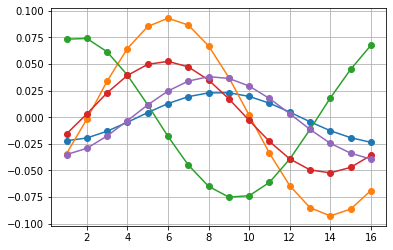

In [8]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:,i], '-o')
plt.grid(True);
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

In [12]:
x.shape

(8, 32)

In [13]:
rr = r.toarray()[:2, :4]

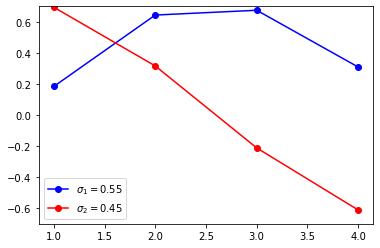

In [17]:
colors = ["b", "r"]
for i, color in enumerate(colors):
    plt.plot(np.arange(1, 5), rr[i], '{}o-'.format(color[i  % len(color)]), label="$\sigma_{" + str(i+1) + "} = " + "{:.2f}".format(s[i]) + "$")
plt.ylim([-0.7, 0.7]);
plt.legend(loc="lower left")
#plt.savefig("basis.png")

In [62]:
print("Points per period", 2*np.pi/kh)

Points per period 10.471975511965978


In [45]:
xc = r.dot(x)
xc_t = xc.transpose()

# Measure distance between x of an aggregate and xc.
d = sklearn.metrics.pairwise.cosine_similarity(x_aggregate_t.transpose(), xc_t.transpose())
print("Distances")
print(d.transpose())

Distances
[[ 0.86  0.98  0.98  0.91]
 [-0.5  -0.18  0.17  0.39]
 [ 0.81  0.78  0.77  0.83]
 [ 0.35  0.04 -0.31 -0.53]]
